<a id="contenido"></a>
<h1><center>Contenido | Módulo 2</center><h1>
    
---
* [Introducción al Web Scrapping con Python](#a)   
* [Breve ejemplo](#b) 
* [CoronaScrapp](#c) 
* [Referencias](#d)

<a id="a"></a>
<h1><center>2.11. Introducción - Web Scrapping</center></h1>

[Regreso a contenido](#contenido)

---
![alt text](https://www.grid.cl/blog/wp-content/uploads/2019/03/001-efficient-web-scraping.png)

Sabemos que **INTERNET** está compuesta por muchos millones de documentos enlazados entre sí, conocidos también como páginas web. 

El texto fuente de las páginas web está escrito en lenguaje Hypertext Markup Language (HTML). Los códigos fuente en HTML son una mezcla de informaciones legibles para los humanos y códigos legibles para las máquinas, llamados tags o etiquetas. El navegador, como puede ser Chrome, Firefox, Safari o Edge, procesa el texto fuente, interpreta las etiquetas y presenta al usuario la información que contienen.

Para extraer del texto fuente únicamente la información que le interesa al usuario, se utiliza un <font color=red>software especial</font>. Se trata de los programas llamados web scrapers, crawlers, spiders o, simplemente, bots, que examinan el texto fuente de las páginas en busca de patrones concretos y extraen la información que contienen. Los datos conseguidos mediante web scraping posteriormente se resumen, combinan, evalúan o almacenan para ser usados más adelante.

En esta notebook veremos un poco del por qué Python resulta especialmente útil para la creación de web scrapers y una introducción a este tema junto con unos ejemplos ([también se puede hacer en R](https://www.r-bloggers.com/2019/07/beautifulsoup-vs-rvest/)...)

### Web scraping en términos generales

El esquema básico del web scraping es sencillo de explicar.... 

En primer lugar, el desarrollador del scraper analiza el texto fuente en HTML de la página web en cuestión. Por lo general, encontrará patrones claros que permitirán extraer la información deseada. El scraper será entonces programado para identificar dichos patrones y realizará el resto del trabajo automáticamente:

   * Abrir la página web a través del URL
   * Extraer automáticamente los datos estructurados a partir de los patrones
   * Resumir, almacenar, evaluar o combinar los datos extraídos, entre otras acciones

### Casos de aplicación del web scraping

El web scraping puede tener aplicaciones muy diversas. Además de la indexación de buscadores, el web scraping también puede usarse con los siguientes fines, entre muchos otros:

  * Crear bases de datos de contactos
  * Controlar y comparar ofertas online
  * Reunir datos de diversas fuentes online
  * Observar la evolución de la presencia y la reputación online
  * Reunir datos financieros, meteorológicos o de otro tipo
  * Observar cambios en el contenido de páginas web
  * Reunir datos con fines de investigación
  * Realizar exploraciones de datos o data mining

### Herramientas de scraping para Python

Python incluye diversas herramientas consolidadas para realizar proyectos de scraping:

   * [Scrapy](https://scrapy.org/)
   * [Selenium](https://selenium-python.readthedocs.io/)
   * [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)

A continuación, nos enfocaremos solamente BeautifulSoup.

### Estructura de la página HTML

El lenguaje de marcado de hipertexto (HTML) es el lenguaje de marcado estándar para documentos diseñados para mostrarse en un navegador web. HTML describe la estructura de una página web y se puede utilizar con hojas de estilo en cascada (CSS) y un lenguaje de secuencias de comandos como JavaScript para crear sitios web interactivos. HTML consta de una serie de elementos que "le dicen" al navegador cómo mostrar el contenido. Por último, los elementos se representan mediante etiquetas.

Aquí hay algunas etiquetas:

    La declaración <!DOCTYPE html> define este documento como HTML5.
    El elemento <html> es el elemento raíz de una página HTML.
    La etiqueta <div> define una división o una sección en un documento HTML. Suele ser un contenedor de otros elementos.
    El elemento <head> contiene metainformación sobre el documento.
    El elemento <title> especifica un título para el documento.
    El elemento <body> contiene el contenido de la página visible.
    El elemento <h1> define un encabezado grande.
    El elemento <p> define un párrafo.
    El elemento <a> define un hipervínculo.

Las etiquetas HTML normalmente vienen en pares como $<p>$ y $</p>$. La primera etiqueta de un par es la etiqueta de apertura, la segunda etiqueta es la etiqueta de cierre. La etiqueta final se escribe como la etiqueta inicial, pero con una barra diagonal insertada antes del nombre de la etiqueta.

HTML tiene una estructura en forma de árbol 🌳 🌲 gracias al Modelo de objetos de documento (DOM), una interfaz multiplataforma e independiente del idioma. Así es como se ve un árbol HTML muy simple. 
![img](https://mechomotive.com/wp-content/uploads/2021/07/HTML-document-tree-representation.png)

In [1]:
from IPython.core.display import display, HTML

In [2]:
display(HTML("""
<!DOCTYPE html>
<html lang="en" dir="ltr">
<head>
  <title>Intro to HTML</title>
</head>

<body>
  <h1>Heading h1</h1>
  <h2>Heading h2</h2>
  <h3>Heading h3</h3>
  <h4>Heading h4</h4>

  <p>
    That's a text paragraph. You can also <b>bold</b>, <mark>mark</mark>, <ins>underline</ins>, <del>strikethrough</del> and <i>emphasize</i> words.
    You can also add links - here's one to <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>.
  </p>

  <p>
    This <br> is a paragraph <br> with <br> line breaks
  </p>

  <p style="color:red">
    Add colour to your paragraphs.
  </p>

  <p>Unordered list:</p>
  <ul>
    <li>Python</li>
    <li>R</li>
    <li>Julia</li>
  </ul>

  <p>Ordered list:</p>
  <ol>
    <li>Data collection</li>
    <li>Exploratory data analysis</li>
    <li>Data analysis</li>
    <li>Policy recommendations</li>
  </ol>
  <hr>

  <!-- This is a comment -->

</body>
</html>
"""))

### Herramientas para desarrolladores de Chrome

[Chrome DevTools](https://developer.chrome.com/docs/devtools/) es un conjunto de herramientas para desarrolladores web integradas directamente en el navegador Google Chrome. DevTools puede ayudar a ver y editar páginas web. Usaremos la herramienta de Chrome para inspeccionar una página HTML y encontrar qué elementos corresponden a los datos que podríamos querer raspar.
ejercicio corto

Para obtener algo de experiencia con la estructura de la página HTML y Chrome DevTools, buscaremos y ubicaremos elementos en IMDB.

Sugerencia: Pulse Comando+Opción+C (Mac) o Control+Mayús+C (Windows, Linux) para acceder al panel de elementos.

## Web Scraping con `requests` y `BeautifulSoup`

Usaremos `requests` y `BeautifulSoup` para acceder y raspar el contenido de [la página de inicio de IMDB](https://www.imdb.com).

### ¿Qué es `BeautifulSoup`?

Es una biblioteca de Python para extraer datos de archivos HTML y XML. Proporciona métodos para navegar por la estructura de árbol del documento que discutimos antes y raspar su contenido.



In [3]:
# Imports
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

%matplotlib inline

In [4]:
# IMDB's homepage
imdb_url = 'https://www.imdb.com'

# Usamos requests para obtener los datos de la URL dada
imdb_response = requests.get(imdb_url)

# Transformamos todo el codigo HTML usando beautiful soup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

# Titulo de la pagina transformada
imdb_soup.title

<title>IMDb: Ratings, Reviews, and Where to Watch the Best Movies &amp; TV Shows</title>

In [5]:
# Podemos obtenerlo de igual forma sin los tags de HTML
imdb_soup.title.string

'IMDb: Ratings, Reviews, and Where to Watch the Best Movies & TV Shows'

In [6]:
url='http://www.imdb.com/chart/top'
page=get(url).content
soup=BeautifulSoup(page,'html.parser')
class_=soup.find_all(name='div',attrs={'class':'wlb_ribbon'})
movie_ids=[c['data-tconst'] for c in class_]

In [7]:
movie_ids

['tt0111161',
 'tt0068646',
 'tt0468569',
 'tt0071562',
 'tt0050083',
 'tt0108052',
 'tt0167260',
 'tt0110912',
 'tt0120737',
 'tt0060196',
 'tt0109830',
 'tt0137523',
 'tt1375666',
 'tt0167261',
 'tt0080684',
 'tt0133093',
 'tt0099685',
 'tt0073486',
 'tt0114369',
 'tt0047478',
 'tt0038650',
 'tt0102926',
 'tt0317248',
 'tt0120815',
 'tt0118799',
 'tt0816692',
 'tt0120689',
 'tt0076759',
 'tt0103064',
 'tt0088763',
 'tt0245429',
 'tt0054215',
 'tt0253474',
 'tt6751668',
 'tt0110413',
 'tt0110357',
 'tt0172495',
 'tt0120586',
 'tt0407887',
 'tt0114814',
 'tt0482571',
 'tt2582802',
 'tt0034583',
 'tt1675434',
 'tt0056058',
 'tt0095327',
 'tt0027977',
 'tt0064116',
 'tt0047396',
 'tt0078748',
 'tt0021749',
 'tt0095765',
 'tt0078788',
 'tt0209144',
 'tt0082971',
 'tt1853728',
 'tt0910970',
 'tt0405094',
 'tt0043014',
 'tt0050825',
 'tt0081505',
 'tt0032553',
 'tt0051201',
 'tt4154756',
 'tt0090605',
 'tt0169547',
 'tt4633694',
 'tt0057012',
 'tt1345836',
 'tt0364569',
 'tt7286456',
 'tt00

In [8]:
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    #print(url+movie_ids[i]+"&apikey=de12b217")
    r=requests.get(url+movie_ids[i]+"&apikey=de12b217").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_omdb=pd.DataFrame(movie_info,columns=r.keys())

In [9]:
df_omdb

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",Two imprisoned men bond over a number of years...,...,81,9.3,"2,651,602",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",The aging patriarch of an organized crime dyna...,...,100,9.2,"1,833,171",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,...,84,9.0,"2,616,676",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True
3,The Godfather Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",The early life and career of Vito Corleone in ...,...,90,9.0,"1,256,506",tt0071562,movie,24 May 2005,"$47,834,595",N/A,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",The jury in a New York City murder trial is fr...,...,96,9.0,"782,913",tt0050083,movie,04 Mar 2008,N/A,N/A,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Dersu Uzala,1975,G,20 Dec 1977,142 min,"Adventure, Biography, Drama",Akira Kurosawa,"Akira Kurosawa, Yuriy Nagibin, Vladimir Arsenev","Maksim Munzuk, Yuriy Solomin, Mikhail Bychkov",The Russian army sends an explorer on an exped...,...,N/A,8.2,"29,631",tt0071411,movie,22 Mar 2007,N/A,N/A,N/A,True
246,The Help,2011,PG-13,10 Aug 2011,146 min,Drama,Tate Taylor,"Tate Taylor, Kathryn Stockett","Viola Davis, Emma Stone, Octavia Spencer",An aspiring author during the civil rights mov...,...,62,8.1,"456,962",tt1454029,movie,06 Dec 2011,"$169,708,112",N/A,N/A,True
247,Gandhi,1982,PG,25 Feb 1983,191 min,"Biography, Drama",Richard Attenborough,John Briley,"Ben Kingsley, John Gielgud, Rohini Hattangadi",The life of the lawyer who became the famed le...,...,79,8.1,"231,604",tt0083987,movie,20 Feb 2007,"$52,767,889",N/A,N/A,True
248,Aladdin,1992,G,25 Nov 1992,90 min,"Animation, Adventure, Comedy","Ron Clements, John Musker","Ron Clements, John Musker, Ted Elliott","Scott Weinger, Robin Williams, Linda Larkin",A kindhearted street urchin and a power-hungry...,...,86,8.0,"415,614",tt0103639,movie,13 Oct 2015,"$217,350,219",N/A,N/A,True


In [10]:
url='http://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(movie_ids))]
for i in range(250):
    #print(url+df_omdb.imdbID[i]+t)
    page=get(url+df_omdb.imdbID[i]+t).content
    soup=BeautifulSoup(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})
    for j in class_:
        plot[i].append(j.get_text(strip = True))

In [11]:
df_omdb['Plot']=plot
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,...,81,9.3,"2,651,602",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[The aging patriarch of an organized crime dyn...,...,100,9.2,"1,833,171",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,...,84,9.0,"2,616,676",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True
3,The Godfather Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,...,90,9.0,"1,256,506",tt0071562,movie,24 May 2005,"$47,834,595",N/A,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[The jury in a New York City murder trial is f...,...,96,9.0,"782,913",tt0050083,movie,04 Mar 2008,N/A,N/A,N/A,True


In [12]:
df_omdb.dtypes

Title         object
Year          object
Rated         object
Released      object
Runtime       object
Genre         object
Director      object
Writer        object
Actors        object
Plot          object
Language      object
Country       object
Awards        object
Poster        object
Ratings       object
Metascore     object
imdbRating    object
imdbVotes     object
imdbID        object
Type          object
DVD           object
BoxOffice     object
Production    object
Website       object
Response      object
dtype: object

### Limpieza de datos

El primer paso para limpiar los datos es convertir Year en una variable categórica. 

Se elegirá el año del 2000 como corte adecuado. Las películas lanzadas antes del 2000 se convirtieron en 0 y después de 2000 en 1. Después de hacer esto, realizamos un one-hot encoding.

In [13]:
df_omdb.Year=pd.to_numeric(df_omdb.Year)
for i in range(250):
    if df_omdb.Year[i]<2000:
        df_omdb.Year[i]=0
    else:
        df_omdb.Year[i]=1
dummy_year=pd.get_dummies(df_omdb.Year)

for i in range(250):
    df_omdb.Runtime[i]=df_omdb.Runtime[i].split()[0]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
df_omdb

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,0,R,14 Oct 1994,142,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,...,81,9.3,"2,651,602",tt0111161,movie,21 Dec 1999,"$28,767,189",N/A,N/A,True
1,The Godfather,0,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[The aging patriarch of an organized crime dyn...,...,100,9.2,"1,833,171",tt0068646,movie,11 May 2004,"$136,381,073",N/A,N/A,True
2,The Dark Knight,1,PG-13,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,...,84,9.0,"2,616,676",tt0468569,movie,09 Dec 2008,"$534,987,076",N/A,N/A,True
3,The Godfather Part II,0,R,18 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,...,90,9.0,"1,256,506",tt0071562,movie,24 May 2005,"$47,834,595",N/A,N/A,True
4,12 Angry Men,0,Approved,10 Apr 1957,96,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[The jury in a New York City murder trial is f...,...,96,9.0,"782,913",tt0050083,movie,04 Mar 2008,N/A,N/A,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Dersu Uzala,0,G,20 Dec 1977,142,"Adventure, Biography, Drama",Akira Kurosawa,"Akira Kurosawa, Yuriy Nagibin, Vladimir Arsenev","Maksim Munzuk, Yuriy Solomin, Mikhail Bychkov",[The Russian army sends an explorer on an expe...,...,N/A,8.2,"29,631",tt0071411,movie,22 Mar 2007,N/A,N/A,N/A,True
246,The Help,1,PG-13,10 Aug 2011,146,Drama,Tate Taylor,"Tate Taylor, Kathryn Stockett","Viola Davis, Emma Stone, Octavia Spencer",[An aspiring author during the civil rights mo...,...,62,8.1,"456,962",tt1454029,movie,06 Dec 2011,"$169,708,112",N/A,N/A,True
247,Gandhi,0,PG,25 Feb 1983,191,"Biography, Drama",Richard Attenborough,John Briley,"Ben Kingsley, John Gielgud, Rohini Hattangadi",[The life of the lawyer who became the famed l...,...,79,8.1,"231,604",tt0083987,movie,20 Feb 2007,"$52,767,889",N/A,N/A,True
248,Aladdin,0,G,25 Nov 1992,90,"Animation, Adventure, Comedy","Ron Clements, John Musker","Ron Clements, John Musker, Ted Elliott","Scott Weinger, Robin Williams, Linda Larkin",[A kindhearted street urchin and a power-hungr...,...,86,8.0,"415,614",tt0103639,movie,13 Oct 2015,"$217,350,219",N/A,N/A,True


In [15]:
df_omdb.dtypes

Title         object
Year           int64
Rated         object
Released      object
Runtime       object
Genre         object
Director      object
Writer        object
Actors        object
Plot          object
Language      object
Country       object
Awards        object
Poster        object
Ratings       object
Metascore     object
imdbRating    object
imdbVotes     object
imdbID        object
Type          object
DVD           object
BoxOffice     object
Production    object
Website       object
Response      object
dtype: object

In [16]:
df_omdb['Runtime'] = pd.to_numeric(df_omdb['Runtime'])

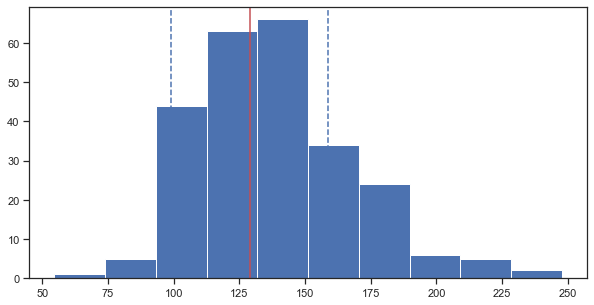

In [17]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(df_omdb['Runtime'],edgecolor='white',align='right')
ax.axvline(x=np.mean(df_omdb['Runtime']),c='r')
ax.axvline(x=np.mean(df_omdb['Runtime'])-np.std(df_omdb['Runtime']),c='b',ls='--')
ax.axvline(x=np.mean(df_omdb['Runtime'])+np.std(df_omdb['Runtime']),c='b',ls='--')
plt.show()

In [18]:
df_omdb['Runtime']=pd.to_numeric(df_omdb['Runtime'],errors='coerce')
for i in range(250):
    if df_omdb.Runtime[i]<=125:
        df_omdb.Runtime[i]=0
    else: 
        df_omdb.Runtime[i]=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df_omdb[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))

<AxesSubplot:>

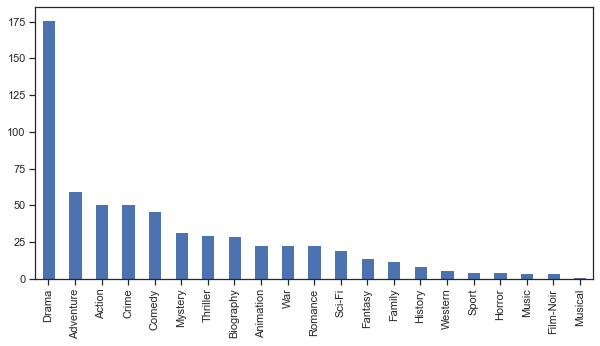

In [20]:
plot_column('Genre')

Elegiremos todos los géneros como nuestros predictores en nuestro conjunto de datos.

In [21]:
#Get the unique genres contained in the dataframe
genres=clean('Genre')
#Add one column for every genre in the dataframe
for genre in genres:
    df_omdb["genre:"+genre] = [int(genre in g.split(', ')) for g in df_omdb.Genre]

In [22]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western
0,The Shawshank Redemption,0,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[The aging patriarch of an organized crime dyn...,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,...,0,0,0,0,0,0,0,0,0,0
3,The Godfather Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,...,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,0,Approved,10 Apr 1957,0,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[The jury in a New York City murder trial is f...,...,0,0,0,0,0,0,0,0,0,0


Ahora analicemos la cantidad de actores que se pueden usar como predictores en nuestro conjunto de datos.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


<AxesSubplot:>

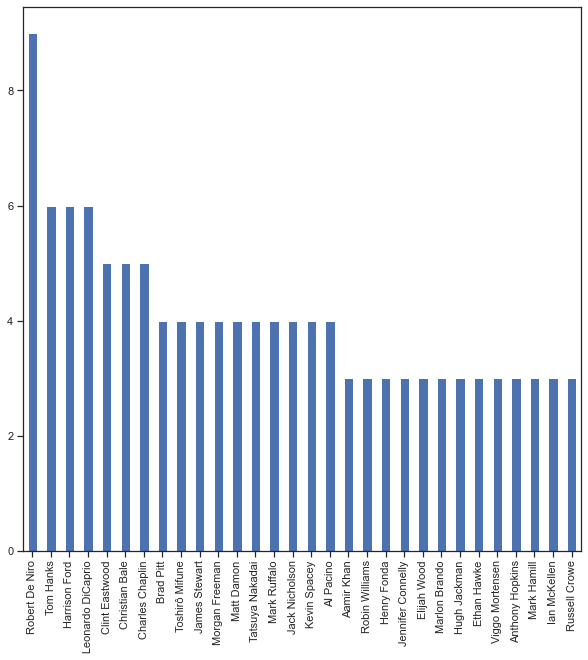

In [23]:
plot_column('Actors',30)

Por lo tanto, podemos tomar a los 30 actores principales, cada uno con más de 3 películas, en la lista de 250 películas principales de imdb.

In [24]:
#Adding actors to our dataset
actors=top('Actors')
actors
for actor in actors[:30]:
    df_omdb["Actor:"+actor] = [int(actor in a.split(', ')) for a in df_omdb.Actors]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


------ 

Ahora los Directores

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


<AxesSubplot:>

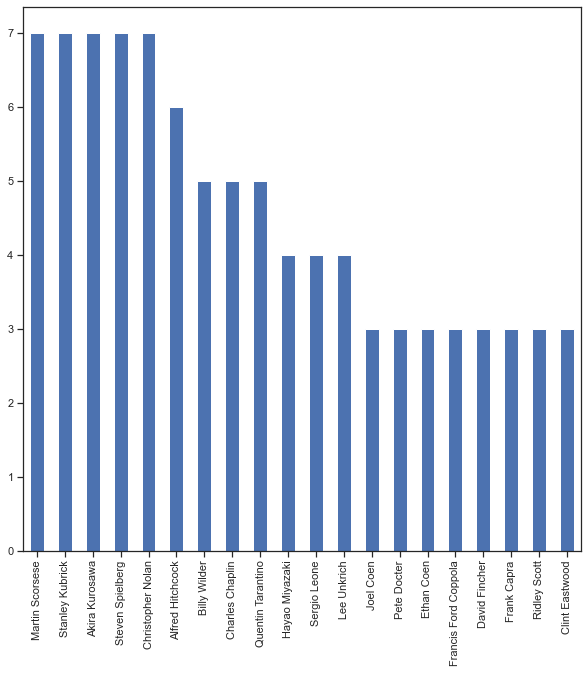

In [25]:
plot_column('Director',20)

In [26]:
directors=top('Director')
    
for director in directors[:20]:
    df_omdb["Director:"+director] = [int(director in d.split(', ')) for d in df_omdb.Director]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Analizar si tomar escritores o no como predictores.

In [27]:
writers1=set()
writers2=set()
for writer_string in df_omdb.Writer:
    writers1.update(writer_string.split(', '))
for j in writers1:
    writers2.update(j.rsplit(' (')[:1])
writers2 = sorted(writers2)

dummy_writers=pd.DataFrame()

# Add one column for every writer in the dataframe
for writer in writers2:
    dummy_writers[writer] = [int(writer in w.split(', ')) for w in df_omdb.Writer]   
dummy_writers

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


,Aaron Guzikowski,Abby Mann,Abhijat Joshi,Adam Elliot,Adolph Green,Agatha Christie,Agenore Incrocci,Akira Kurosawa,Akiva Goldsman,Akiyuki Nosaka,...,William Wisher,Winston Groom,Wladyslaw Szpilman,Wolfgang Petersen,Yasuhiko Takiguchi,Yasujirô Ozu,Yuriy Nagibin,Zach Lewis,Zdenek Mahler,Éric Toledano
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

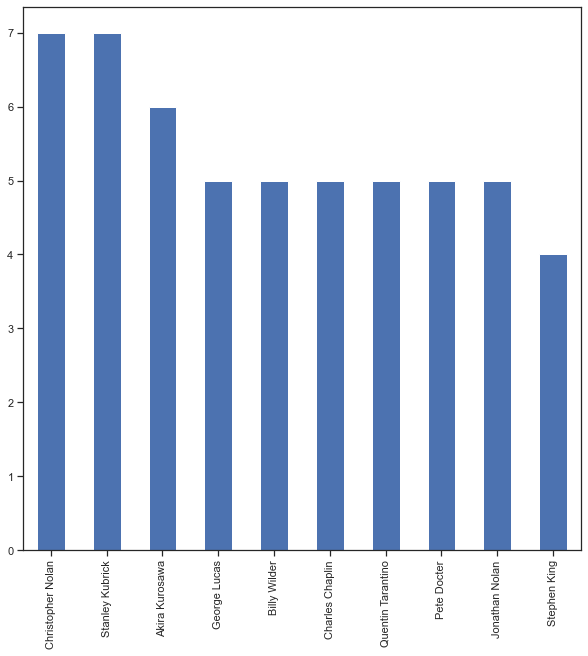

In [28]:
writerlist=[w for w in writers2]
wlt=dummy_writers[writerlist].sum()
wlt=wlt.sort_values(axis=0,ascending=False)
wlt.iloc[0:10].plot(kind = "bar",figsize=(10,10))

Dado que no hay muchos escritores que tengan un número significativo de películas, decidimos no tomar a los escritores como uno de nuestros predictores.

Ahora, exploraremos el predictor de lenguaje

<AxesSubplot:>

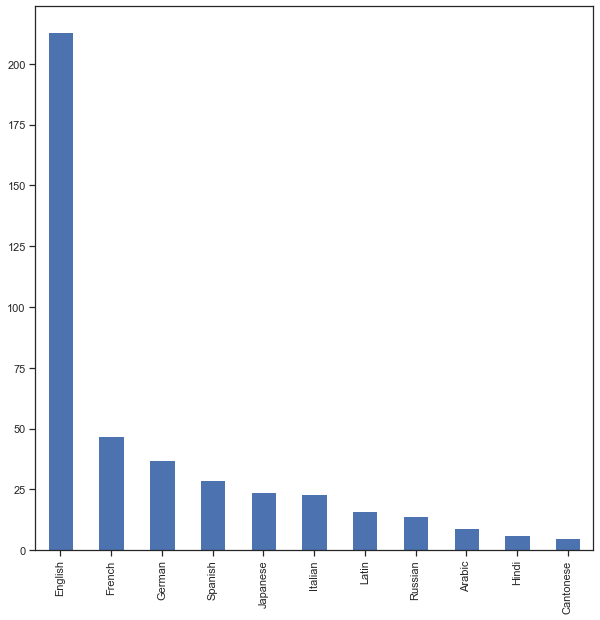

In [29]:
plot_column('Language',11)

<AxesSubplot:>

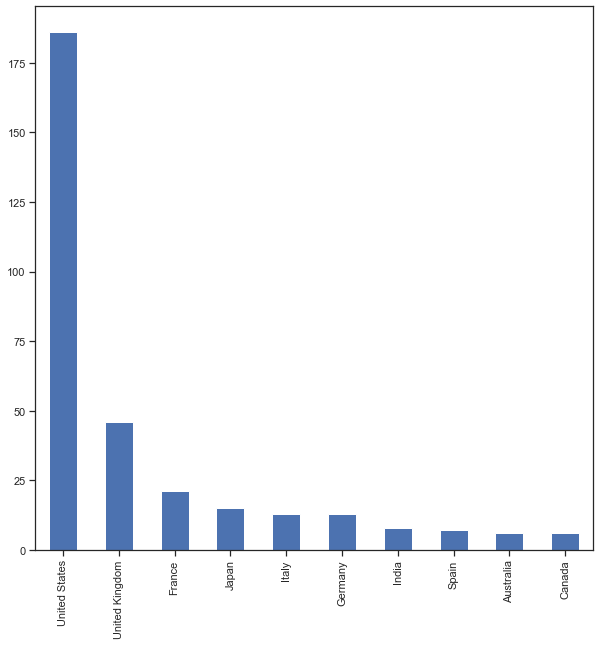

In [30]:
plot_column('Country',10)

In [31]:
#Adding all of the top 10 countries to our datset
countries=top('Country')

for country in countries[:10]:
    df_omdb["Country:"+country] = [int(country in c.split(', ')) for c in df_omdb.Country]

In [32]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Country:United States,Country:United Kingdom,Country:France,Country:Japan,Country:Italy,Country:Germany,Country:India,Country:Spain,Country:Australia,Country:Canada
0,The Shawshank Redemption,0,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,...,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[The aging patriarch of an organized crime dyn...,...,1,0,0,0,0,0,0,0,0,0
2,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,...,1,1,0,0,0,0,0,0,0,0
3,The Godfather Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,...,1,0,0,0,0,0,0,0,0,0
4,12 Angry Men,0,Approved,10 Apr 1957,0,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[The jury in a New York City murder trial is f...,...,1,0,0,0,0,0,0,0,0,0


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Metascore', ylabel='count'>

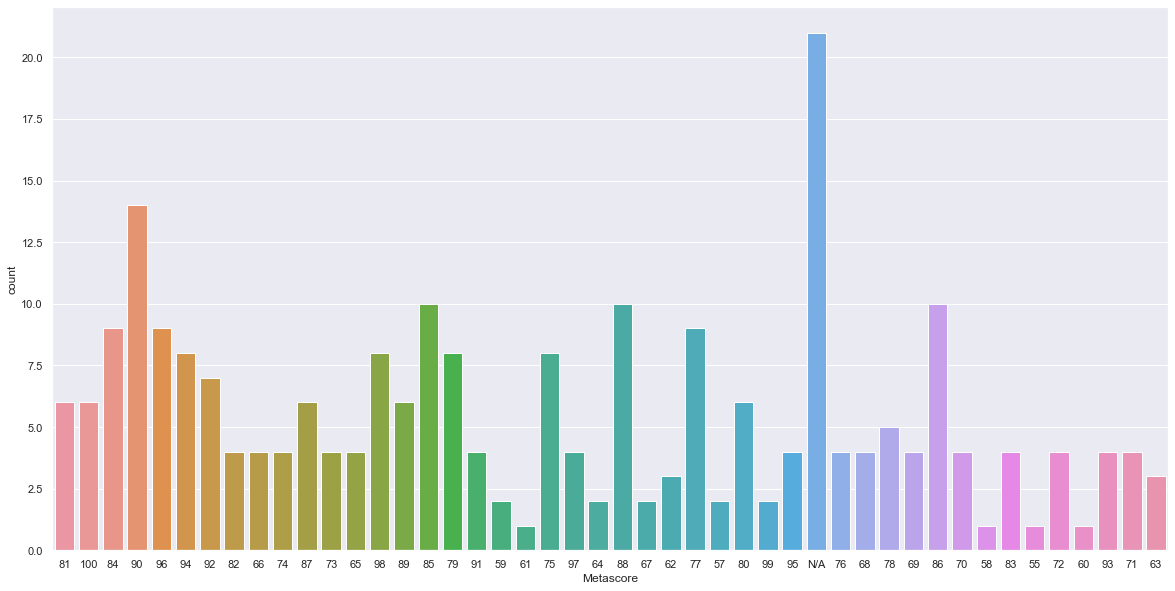

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(df_omdb['Metascore'])

In [34]:
from wordcloud import WordCloud, STOPWORDS

In [35]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

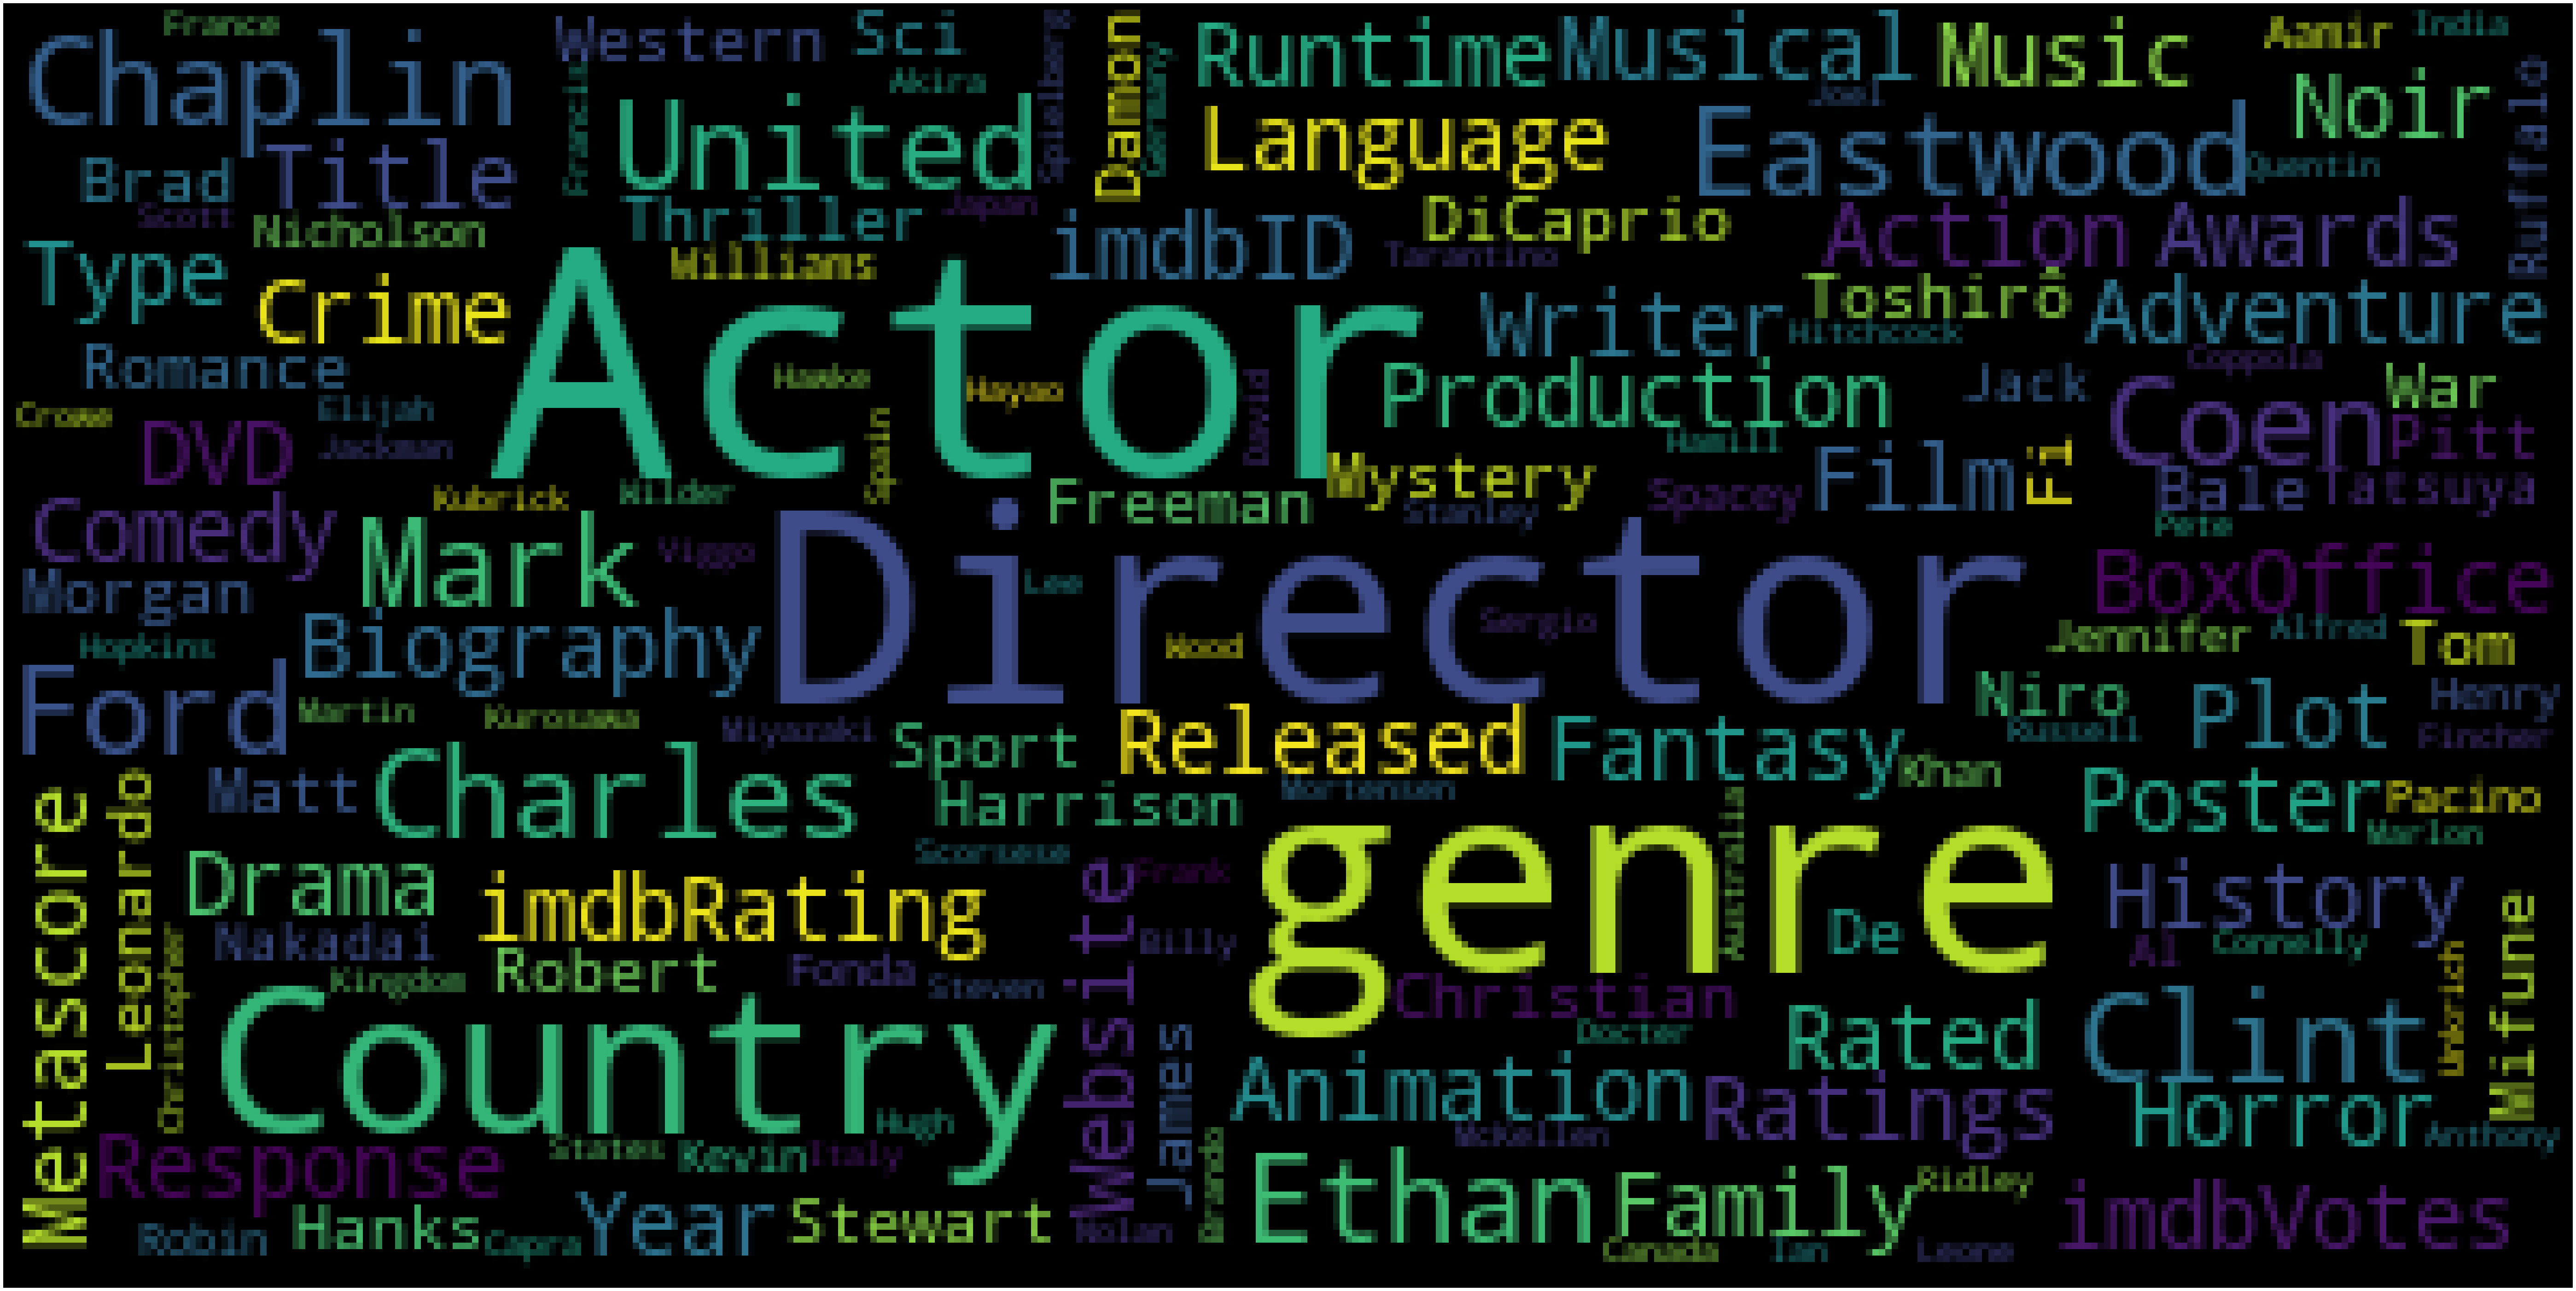

In [36]:
wc(df_omdb,'black','Most Used Words')

---
### Web scraping con Scrapy

Scrapy, una de las herramientas para hacer web scraping con Python que presentamos, utiliza un analizador sintáctico o parser HTML para extraer datos del texto fuente (en HTML) de la web siguiendo este esquema:

$$URL → Solicitud HTTP → HTML → Scrapy$$

El concepto clave del desarrollo de scrapers con Scrapy son los llamados web spiders, programas de scraping sencillos y basados en Scrapy. Cada spider (araña) está programado para scrapear una web concreta y va descolgándose de página a página. La programación usada está orientada a objetos: cada spider es una clase de Python propia.

Además del paquete de Python en sí, la instalación de Scrapy incluye una herramienta de línea de comandos, la Scrapy Shell, que permite controlar los spiders. Además, los spiders ya creados pueden almacenarse en la Scrapy Cloud. Desde allí, se ejecutan con tiempos establecidos. De esta forma pueden scrapearse también sitios web complejos sin necesidad de utilizar para ello el propio ordenador ni la propia conexión a Internet. Otra manera de hacerlo es crear un servidor de web scraping propio usando el software de código abierto Scrapyd.

Scrapy es una plataforma consolidada para aplicar técnicas de web scraping con Python. Su arquitectura está orientada a las necesidades de proyectos profesionales. Scrapy cuenta, por ejemplo, con un pipeline integrado para procesar los datos extraídos. La apertura de las páginas en Scrapy se produce de forma asíncrona, es decir, con la posibilidad de descargar varias páginas simultáneamente. Por ello, Scrapy es una buena opción para proyectos de scraping que hayan de procesar de grandes volúmenes de páginas.

---
### Web scraping con Selenium

El software libre Selenium es un framework para realizar test automatizados de software a aplicaciones web. En principio, fue desarrollado para poner a prueba páginas y apps web, pero el WebDriver de Selenium también puede usarse con Python para realizar scraping. Si bien Selenium en sí no está escrito en Python, con este lenguaje de programación es posible acceder a las funciones del software.

A diferencia de Scrapy y de BeautifulSoup, Selenium no trabaja con el texto fuente en HTML de la web en cuestión, sino que carga la página en un navegador sin interfaz de usuario. El navegador interpreta entonces el código fuente de la página y crea, a partir de él, un Document Object Model (modelo de objetos de documento o DOM). Esta interfaz estandarizada permite poner a prueba las interacciones de los usuarios. De esta forma se consigue, por ejemplo, simular clics y rellenar formularios automáticamente. Los cambios en la web que resultan de dichas acciones se reflejan en el DOM. La estructura del proceso de web scraping con Selenium es la siguiente:

$$URL → Solicitud HTTP → HTML → Selenium → DOM$$

Puesto que el DOM se genera de manera dinámica, Selenium permite scrapear también páginas cuyo contenido ha sido generado mediante JavaScript. El acceso a contenidos dinámicos es la ventaja más importante de Selenium. En términos prácticos, Selenium también puede usarse en combinación con Scrapy o con BeautifulSoup: Selenium proporcionaría el texto fuente, mientras que la segunda herramienta se encargaría del análisis sintáctico y la evaluación de los datos. En este caso, el esquema que se seguiría tendría esta forma:

$$URL → Solicitud HTTP → HTML → Selenium → DOM → HTML → Scrapy / BeautifulSoup$$

---
### Web scraping con BeautifulSoup

De las tres herramientas que presentamos para realizar web scraping con Python, BeautifulSoup es la más antigua. Al igual que en el caso de Scrapy, se trata de un parser o analizador sintáctico HTML. El web scraping con BeautifulSoup tiene la siguiente estructura:

$$URL → Solicitud HTTP → HTML → BeautifulSoup$$

Sin embargo, a diferencia de Scrapy, en BeautifulSoup el desarrollo del scraper no requiere una programación orientada a objetos, sino que el scraper se redacta como una sencilla secuencia de comandos o script. Con ello, BeautifulSoup ofrece el método más fácil para pescar información de la sopa de tags a la que hace honor su nombre.

---
---
### En resumen

¿Qué herramienta deberías elegir para tu proyecto? 

En resumen: escoge **BeautifulSoup** si necesitas un desarrollo rápido o si quieres familiarizarte primero con los conceptos de Python y de web scraping. **Scrap**y, por su parte, te permite realizar complejas aplicaciones de web scraping en Python si dispones de los conocimientos necesarios. **Selenium** será tu mejor opción si tu prioridad es extraer contenidos dinámicos con Python.

<a id="b"></a>
### 2.11.1 Breves ejemplos de web scraping
[Regreso a contenido](#contenido)

---

 * Extraer citas y autores con Python y BeautifulSoup

La página [web Quotes to Scrape](http://quotes.toscrape.com/) ofrece toda una colección de citas de personajes famosos pensadas especialmente para ser objeto de test de scraping, para que no tengas que preocuparte por incumplir las condiciones de uso.

In [37]:
# Importar módulos
import requests
import csv
from bs4 import BeautifulSoup
# Dirección de la página web
url = "http://quotes.toscrape.com/"
# Ejecutar GET-Request
response = requests.get(url)
# Analizar sintácticamente el archivo HTML de BeautifulSoup del texto fuente
html = BeautifulSoup(response.text, 'html.parser')
# Extraer todas las citas y autores del archivo HTML
quotes_html = html.find_all('span', class_="text")
authors_html = html.find_all('small', class_="author")
# Crear una lista de las citas
quotes = list()
for quote in quotes_html:
    quotes.append(quote.text)
# Crear una lista de los autores
authors = list()
for author in authors_html:
    authors.append(author.text) 
# Para hacer el test: combinar y mostrar las entradas de ambas listas
for t in zip(quotes, authors):
    print(t)
# Guardar las citas y los autores en un archivo CSV en el directorio actual
# Abrir el archivo con Excel / LibreOffice, etc.
with open('./zitate.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, dialect='excel')
    csv_writer.writerows(zip(quotes, authors))

('“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'Albert Einstein')
('“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'J.K. Rowling')
('“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', 'Albert Einstein')
('“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', 'Jane Austen')
("“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", 'Marilyn Monroe')
('“Try not to become a man of success. Rather become a man of value.”', 'Albert Einstein')
('“It is better to be hated for what you are than to be loved for what you are not.”', 'André Gide')
("“I have not failed. I've just found 10,000 ways that won't work.”", 'Thomas A. Edison')
("“A woman is like a tea bag; you never know how strong it i

---

<a id="c"></a>
### 2.11.2 Scrapping Coronavirus
[Regreso a contenido](#contenido)

---


In [38]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import pandas as pd
import datetime

In [39]:
today=datetime.date.today().strftime("%m-%d-%Y")
data_date=datetime.date.today()-datetime.timedelta(days=1)
print("Today is {}".format(today))
data_date=data_date.strftime("%m-%d-%Y")

Today is 10-24-2022


In [40]:
url= 'https://www.worldometers.info/coronavirus/'


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
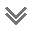

In [41]:
# get web data
req = requests.get(url)
response = req.content
# parse web data
soup = BeautifulSoup(response, "html.parser")
soup

In [42]:
# find the table
#table is in the last of the page

thead= soup.find_all('thead')[-1]
print(thead)

<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>
</thead>


In [43]:
# get all rows in thead
head = thead.find_all('tr')
head

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>]

In [44]:
# get the table data content
tbody = soup.find_all('tbody')[0]
tbody

<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>117,534,450</td>
<td></td>
<td>1,549,870</td>
<td></td>
<td>112,949,358</td>
<td>+2,592</td>
<td>3,035,222</td>
<td>7,796</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>192,811,303</td>
<td>+43,960</td>
<td>1,485,964</td>
<td>+17</td>
<td>186,655,293</td>
<td>+22,651</td>
<td>4,670,046</td>
<td>9,483</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_

In [45]:
body = tbody.find_all('tr')
body

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>117,534,450</td>
 <td></td>
 <td>1,549,870</td>
 <td></td>
 <td>112,949,358</td>
 <td>+2,592</td>
 <td>3,035,222</td>
 <td>7,796</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <td>
 </td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>192,811,303</td>
 <td>+43,960</td>
 <td>1,485,964</td>
 <td>+17</td>
 <td>186,655,293</td>
 <td>+22,651</td>
 <td>4,670,046</td>
 <td>9,483</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>
 <td>
 </td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <

In [46]:
# get the table contents

# container for  column title
head_rows = []


# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
print(head_rows[0])

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [47]:
# container for contents
body_rows = []

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
print(body_rows)

[['', '\nNorth America\n', '117,534,450', '', '1,549,870', '', '112,949,358', '+2,592', '3,035,222', '7,796', '', '', '', '', '', 'North America', '\n', '', '', '', '', ''], ['', '\nAsia\n', '192,811,303', '+43,960', '1,485,964', '+17', '186,655,293', '+22,651', '4,670,046', '9,483', '', '', '', '', '', 'Asia', '\n', '', '', '', '', ''], ['', '\nEurope\n', '233,311,716', '', '1,936,867', '', '225,644,821', '+29,414', '5,730,028', '9,889', '', '', '', '', '', 'Europe', '\n', '', '', '', '', ''], ['', '\nSouth America\n', '64,351,355', '', '1,332,103', '', '62,686,740', '', '332,512', '10,160', '', '', '', '', '', 'South America', '\n', '', '', '', '', ''], ['', '\nOceania\n', '12,548,452', '+1,509', '21,445', '+11', '12,313,894', '', '213,113', '93', '', '', '', '', '', 'Australia/Oceania', '\n', '', '', '', '', ''], ['', '\nAfrica\n', '12,665,373', '', '257,768', '', '11,999,768', '+12', '407,837', '899', '', '', '', '', '', 'Africa', '\n', '', '', '', '', ''], ['', '\n\n', '721', '', 

In [48]:
df_bs = pd.DataFrame(body_rows[:len(body_rows)],columns=head_rows[0]) 
df_bs

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"117,534,450",,"1,549,870",,"112,949,358","+2,592","3,035,222","7,796",...,,,,North America,\n,,,,,
1,,\nAsia\n,"192,811,303","+43,960","1,485,964",+17,"186,655,293","+22,651","4,670,046","9,483",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"233,311,716",,"1,936,867",,"225,644,821","+29,414","5,730,028","9,889",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"64,351,355",,"1,332,103",,"62,686,740",,"332,512","10,160",...,,,,South America,\n,,,,,
4,,\nOceania\n,"12,548,452","+1,509","21,445",+11,"12,313,894",,"213,113",93,...,,,,Australia/Oceania,\n,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,226,Vatican City,29,,,,29,,0,,...,,,799,Europe,28,,,,,
234,227,Tuvalu,20,,,,,,20,,...,,,"12,066",Australia/Oceania,603,,,,,"1,658"
235,228,Western Sahara,10,,1,,9,,0,,...,,,"626,161",Africa,"62,616","626,161",,,,
236,229,MS Zaandam,9,,2,,7,,0,,...,,,,,,,,,,


In [50]:
# continentdata
cols=['Continent','TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', ]

continent_data = df_bs.iloc[:8, :-3].reset_index(drop=True)


# drop unwanted columns
continent_data = continent_data.drop('#', axis=1)
#rearrange Columns Sequence
continent_data = continent_data[cols]
continent_data['Continent'].loc[6]="Not Assigned"
continent_data['Continent'].loc[7]="World"


continent_data

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical"
0,North America,"117,534,450",,"1,549,870",,"112,949,358","+2,592","3,035,222","7,796"
1,Asia,"192,811,303","+43,960","1,485,964",+17,"186,655,293","+22,651","4,670,046","9,483"
2,Europe,"233,311,716",,"1,936,867",,"225,644,821","+29,414","5,730,028","9,889"
3,South America,"64,351,355",,"1,332,103",,"62,686,740",,"332,512","10,160"
4,Australia/Oceania,"12,548,452","+1,509","21,445",+11,"12,313,894",,"213,113",93
5,Africa,"12,665,373",,"257,768",,"11,999,768",+12,"407,837",899
6,Not Assigned,721,,15,,706,,0,0
7,World,"633,223,370","+45,469","6,584,032",+28,"612,250,580","+54,660","14,388,758","38,320"


---
---
---
<a id="d"></a>
<h1><center>Referencias y links de interés</center></h1>

[Regreso a contenido](#contenido)

---

* [Rvest para R](https://www.r-bloggers.com/2019/07/beautifulsoup-vs-rvest/)
* [Scrapy](https://scrapy.org/)
* [Selenium](https://selenium-python.readthedocs.io/)
* [BeautifulSoup](https://pypi.org/project/beautifulsoup4/)

-------

* [Tutorial Scrapy](https://docs.scrapy.org/en/latest/intro/tutorial.html)
* [Ejemplos de Scrapy](https://www.analyticsvidhya.com/blog/2017/07/web-scraping-in-python-using-scrapy/)

-------
* [Tutorial Selenium](https://selenium-python.readthedocs.io/getting-started.html)
* [Ejemplos de Selenium](https://www.guru99.com/selenium-python.html)

-------

* [Tutorial de BeautifulSoap](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Ejemplos de BeautifulSoap](https://realpython.com/beautiful-soup-web-scraper-python/)